<h1 align="center">Agglomerative Hierarchical Clustering for Eligibility Criteria Sentences</h1>

* Agglomerative Hierarchical Clustering with Python using Scipy and Scikit-learn package.
* We used the hierarchical agglomerative clustering algorithm, works in a “bottom-up” manner, to cluster established semantic feature matrix and generate clusters based on criteria sentences similarity.
***

load packages

In [1]:
import csv
import json
import pandas as pd
import numpy as np

from sklearn import metrics
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**load feature data (UMLS semantic feature based)**

In [2]:
data = pd.read_csv('./data/feature_matrix_data.csv')

In [3]:
print ("Shape of data: ", data.shape)
data.head()

Shape of data:  (19185, 127)


,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,antb,...,shro,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0
3,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0


**To check how good our clustering we use the Silhouette coefficient**

In [4]:
# n_clusters: it must be None if distance_threshold is not None
# affinity: euclidean,
# linkage: average uses the average of the distances of each observation of the two sets.
# distance_threshold: The linkage distance threshold above which, clusters will not be merged
silhouette_scores = list()
labels_ = list()
for d in [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]:
    model = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="average", distance_threshold=d)
    clustering = model.fit(data)
    labels = clustering.labels_
    labels_.append(labels)
    ss = metrics.silhouette_score(data, labels, metric='euclidean')
    silhouette_scores.append(ss)
    print(d, ss)

0.5 0.13493583340566784
0.55 0.11100734584557431
0.6 0.08518307406187034
0.65 0.03891117895152641
0.7 0.05687572605457083
0.75 0.05831862225544753
0.8 0.09151479032132039
0.85 0.10091343110972859
0.9 0.1251138667772942


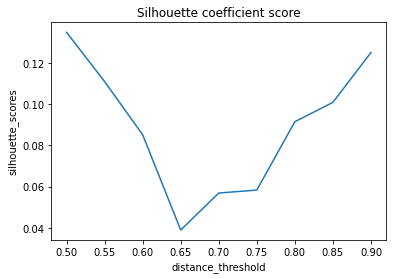

In [5]:
plt.plot([0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90],silhouette_scores)
plt.title("Silhouette coefficient score")
plt.xlabel("distance_threshold")
plt.ylabel("silhouette_scores")
plt.show()

In [6]:
labels_count = [len(set(l)) for l in labels_]
print(labels_count)

[808, 622, 445, 295, 118, 71, 60, 51, 44]


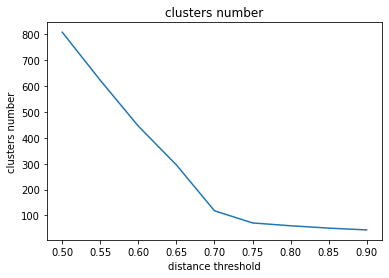

In [7]:
plt.plot([0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90], labels_count)
plt.title("clusters number")
plt.xlabel("distance threshold")
plt.ylabel("clusters number")
plt.show()

**Now, we train a model with an optimum d(=0.65) value**

In [8]:
model = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="average", distance_threshold=0.65)
clustering = model.fit(data)
labels = clustering.labels_

In [9]:
print(len(set(labels)))
print(labels[:10])

295
[ 28  28  28 165  25   1  35 144  28  14]


In [10]:
metrics.silhouette_score(data, labels, metric='euclidean')

0.03891117895152641

**add cluster labels to data**

In [11]:
data1 = data.copy()
data1['cluster'] = labels

In [13]:
data1.head()

,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,antb,...,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt,cluster
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,28
2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0,28
3,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,28
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,165
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,25


**show the label distribution**

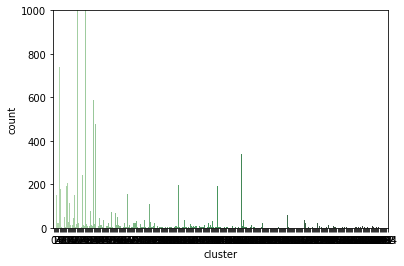

In [14]:
sns.countplot(x="cluster", data=data1, palette="Greens_d")
plt.ylim(0,1000)
plt.show()

**check the cluster with raw sentences**

In [15]:
clustering_results = []
with open("./data/criteria_sentences_preprocessed_metamap_filter(19185).json", "r", encoding="utf-8") as f:
    criteria_info = json.load(f)
    for criteria in criteria_info["criteria"]:
        no = int(criteria["No."])
        criteria_sentence = criteria["criteria_sentence"]
        cluster_ = data1.loc[no, "cluster"]
        clustering_results.append([cluster_, no, criteria_sentence])
clustering_results_sort = sorted(clustering_results, key=lambda x:x[0])

In [16]:
for i in clustering_results_sort:
    if i[0] == 22:
        print("Cluster: {}, raw ID: {}, raw sentence: {}".format(i[0], i[1], i[2].strip()))

Cluster: 22, raw ID: 63, raw sentence: (5) 正在参与其他药物临床试验的患者。
Cluster: 22, raw ID: 297, raw sentence: 7、参与其他临床研究治疗
Cluster: 22, raw ID: 905, raw sentence: ⑧正在参加其他临床试验的患者；
Cluster: 22, raw ID: 1548, raw sentence: 2. 正在参加其他药物临床试验患者；
Cluster: 22, raw ID: 2250, raw sentence: 7. 患者同时正参加其他临床试验研究。
Cluster: 22, raw ID: 3005, raw sentence: （5）病人参与其他试验。
Cluster: 22, raw ID: 3034, raw sentence: （8）正参加其它临床试验的患者；
Cluster: 22, raw ID: 3092, raw sentence: (3)正在其它临床试验中
Cluster: 22, raw ID: 3121, raw sentence: （8）正参加其它临床试验的患者；
Cluster: 22, raw ID: 3679, raw sentence: 1. 正参加其它临床试验的患者；
Cluster: 22, raw ID: 5195, raw sentence: 8.正参加其它临床试验者。
Cluster: 22, raw ID: 5271, raw sentence: （5）正在参加其它临床实验的患者。
Cluster: 22, raw ID: 6249, raw sentence: 8、正参加其它临床试验的患者；
Cluster: 22, raw ID: 7731, raw sentence: H．伴随其他抗肿瘤治疗或正在参加其他临床试验；
Cluster: 22, raw ID: 9178, raw sentence: 9)同时参加其它临床试验者。
Cluster: 22, raw ID: 13307, raw sentence: b）患者同时参加了其他临床研究
Cluster: 22, raw ID: 13527, raw sentence: 14）同时参与其他临床研究者
Cluster: 22, raw ID: 

In [17]:
with open("./data/hierarchical_cluster_results.csv", "w", newline="", encoding="utf-8") as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(clustering_results_sort)